In [1]:
from pathlib import Path


import pandas as pd
from matplotlib import pyplot as plt
from scipy import integrate as si
from scipy import interpolate as sp


xlim = 30
to_invcm = 33.356

plt.style.use("../paper.mplstyle")

Path().cwd()

PosixPath('/Users/flokno/working/projects/tdep/Raman/paper_raman_data/figure_06')

In [2]:
def normalize(x, y, xmin=100, factor=0.95):
    mask = x > xmin
    _x = x[mask]
    _y = y[mask]
    y_int = si.trapezoid(_y - _y.min(), _x)
    y_out = y / y_int
    return y_out / y_out.max() * factor

In [3]:
df_exp = pd.read_csv(
    "BaZrS3_Raman_785nm_Norm.txt",
    delimiter="\t",
    header=0,
    index_col="X_BaZrS3_785_TD",
)

df_theory = pd.read_csv("outfile.raman_intensity_101.csv", index_col="frequency")

df_dos = pd.read_csv("outfile.phonon_dos_convolutions.csv", index_col="frequency_cm")

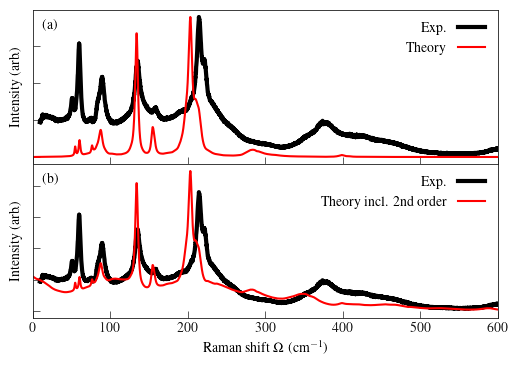

In [4]:
fig, axs = plt.subplots(figsize=(6, 4), nrows=2, sharex=True)
fig.subplots_adjust(hspace=0.0)

ax = axs[0]

_df = df_exp
_x = _df.index
_y = df_exp["Y_BaZrS3_785_300K_8552_300K_Cut_NtV"]

ax.plot(_x, normalize(_x, _y), color="black", lw=3, label="Exp.")


_df = df_theory
_x = _df.index
_y = df_theory["intensity_unpolarized"]


ax.plot(_x, normalize(_x, _y), color="red", lw=1.5, label="Theory")

ax.legend(loc=1, frameon=False, markerfirst=False)

ax.set_yticklabels([])
ax.set_ylabel("Intensity (arb.)")

# 2nd order
ax = axs[1]
_df = df_exp
_x = _df.index
_y = df_exp["Y_BaZrS3_785_300K_8552_300K_Cut_NtV"]
ax.plot(_x, normalize(_x, _y), color="black", lw=3, label="Exp.")


_df = df_theory
_x = _df.index
_y = df_theory["intensity_unpolarized"]


x2 = df_dos.index
y2 = df_dos.dos_weighted_convoluted
_y2 = sp.interp1d(x2, y2, kind="cubic", fill_value=0, bounds_error=False)(_x)
ax.plot(
    _x,
    normalize(_x, _y) + 3.5e-3 * _y2,
    color="red",
    lw=1.5,
    label="Theory incl. 2nd order",
)


ax.legend(loc=1, frameon=False, markerfirst=False)

ax.set_yticklabels([])
ax.set_ylabel("Intensity (arb.)")

ax.set_xlim(-600, 600)
ax.set_xlim(0, 600)

ax.set_xlabel(r"Raman shift $\Omega$ (cm$^{-1}$)")

for _ax, _l in zip(axs, ["(a)", "(b)"]):
    _ax.text(12, 0.875 * _ax.get_ylim()[1], _l)


file = "plot_bzs_300K_unpolarized.pdf"
fig.savefig(file)
fig.savefig(Path(file).stem + ".png")